<a href="https://colab.research.google.com/github/Sebas1020h/challenge1-data-science-latam-main/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [52]:
#Sumar los valores de la columna Precio de cada conjunto de datos de la tienda
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

print(f"Ingreso total Tienda 1: {int(ingreso_total_tienda1)}")
print(f"Ingreso total Tienda 2: {int(ingreso_total_tienda2)}")
print(f"Ingreso total Tienda 3: {int(ingreso_total_tienda3)}")
print(f"Ingreso total Tienda 4: {int(ingreso_total_tienda4)}")

Ingreso total Tienda 1: 1150880400
Ingreso total Tienda 2: 1116343500
Ingreso total Tienda 3: 1098019600
Ingreso total Tienda 4: 1038375700


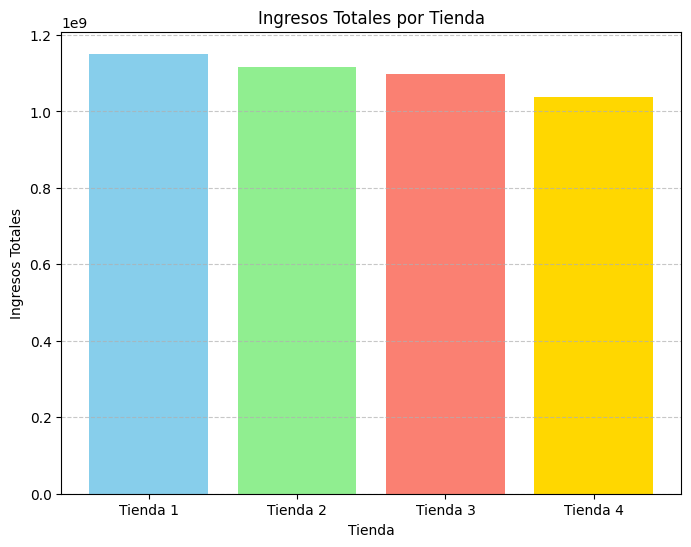

In [55]:
import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_total_tienda1, ingreso_total_tienda2, ingreso_total_tienda3, ingreso_total_tienda4]

plt.figure(figsize=(8, 6))
plt.bar(tiendas, ingresos, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Ventas por categoría

In [17]:
import pandas as pd
# Concatenar los dataframes de las tiendas
tiendas = pd.concat([tienda.assign(Tienda='Tienda 1'),
                        tienda2.assign(Tienda='Tienda 2'),
                        tienda3.assign(Tienda='Tienda 3'),
                        tienda4.assign(Tienda='Tienda 4')])

# Agrupar por Tienda y Categoría y contar las ventas
ventas_por_categoria = tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Encontrar las categorías más populares por tienda y ordenar por cantidad vendida en orden descendente dentro de cada tienda
ventas_por_categoria_descendente = ventas_por_categoria.sort_values(by=['Tienda', 'Cantidad Vendida'], ascending=[True, False])

# Mostrar las 3 categorías más populares por tienda
top_categorias_por_tienda = ventas_por_categoria_descendente.groupby('Tienda').head(3).reset_index(drop=True)

print("\nCantidad de productos vendidos por categoría en cada tienda:\n")
print(ventas_por_categoria)

print("\nCategorías más populares por tienda:\n")
top_categorias_por_tienda


Cantidad de productos vendidos por categoría en cada tienda:

      Tienda   Categoría del Producto  Cantidad Vendida
0   Tienda 1  Artículos para el hogar               171
1   Tienda 1     Deportes y diversión               284
2   Tienda 1        Electrodomésticos               312
3   Tienda 1             Electrónicos               448
4   Tienda 1   Instrumentos musicales               182
5   Tienda 1                 Juguetes               324
6   Tienda 1                   Libros               173
7   Tienda 1                  Muebles               465
8   Tienda 2  Artículos para el hogar               181
9   Tienda 2     Deportes y diversión               275
10  Tienda 2        Electrodomésticos               305
11  Tienda 2             Electrónicos               422
12  Tienda 2   Instrumentos musicales               224
13  Tienda 2                 Juguetes               313
14  Tienda 2                   Libros               197
15  Tienda 2                  Muebles    

,Tienda,Categoría del Producto,Cantidad Vendida
0,Tienda 1,Muebles,465
1,Tienda 1,Electrónicos,448
2,Tienda 1,Juguetes,324
3,Tienda 2,Muebles,442
4,Tienda 2,Electrónicos,422
5,Tienda 2,Juguetes,313
6,Tienda 3,Muebles,499
7,Tienda 3,Electrónicos,451
8,Tienda 3,Juguetes,315
9,Tienda 4,Muebles,480


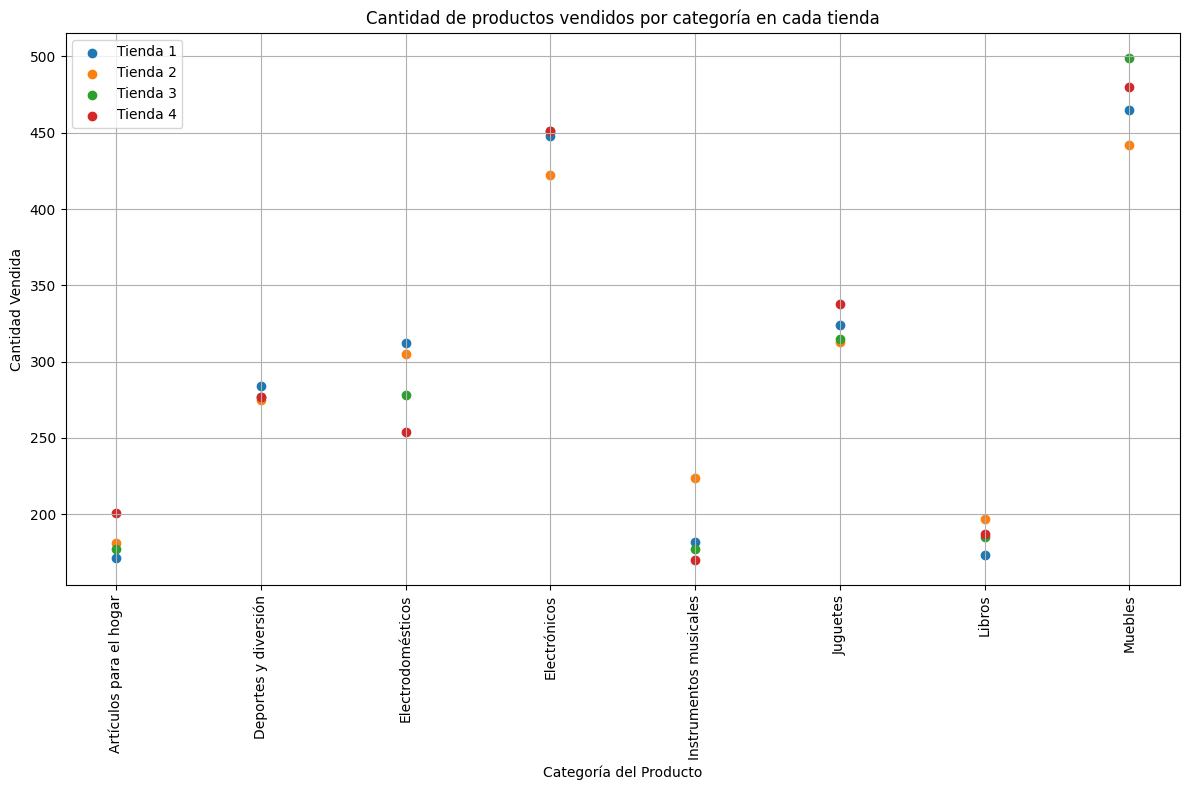

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for tienda_name in ventas_por_categoria['Tienda'].unique():
    df_tienda = ventas_por_categoria[ventas_por_categoria['Tienda'] == tienda_name]
    plt.scatter(df_tienda['Categoría del Producto'], df_tienda['Cantidad Vendida'], label=tienda_name)

plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad de productos vendidos por categoría en cada tienda')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [24]:
# Calcular el promedio de calificación para cada tienda utilizando la funcion mean
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()



print(f"Calificación promedio Tienda 1: {round(calificacion_promedio_tienda1,2)}")
print(f"Calificación promedio Tienda 2: {round(calificacion_promedio_tienda2,2)}")
print(f"Calificación promedio Tienda 3: {round(calificacion_promedio_tienda3,2)}")
print(f"Calificación promedio Tienda 4: {round(calificacion_promedio_tienda4,2)}")


Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.0


In [25]:
# Calcular el promedio de calificación para cada tienda utilizando la funcion sum
calificacion_promedio_tienda1 = tienda['Calificación'].sum() / len(tienda['Calificación'])
calificacion_promedio_tienda2 = tienda2['Calificación'].sum() / len(tienda['Calificación'])
calificacion_promedio_tienda3 = tienda3['Calificación'].sum() / len(tienda['Calificación'])
calificacion_promedio_tienda4 = tienda4['Calificación'].sum() / len(tienda['Calificación'])



print(f"Calificación promedio Tienda 1: {round(calificacion_promedio_tienda1,2)}")
print(f"Calificación promedio Tienda 2: {round(calificacion_promedio_tienda2,2)}")
print(f"Calificación promedio Tienda 3: {round(calificacion_promedio_tienda3,2)}")
print(f"Calificación promedio Tienda 4: {round(calificacion_promedio_tienda4,2)}")

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 3.99


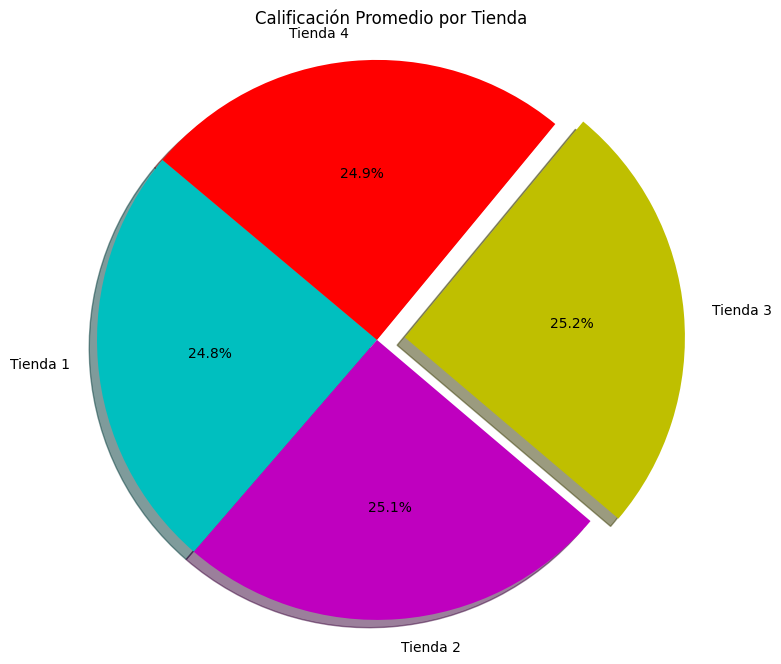

In [73]:
import matplotlib.pyplot as plt

calificaciones = [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]
etiquetas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['c', 'm', 'y', 'r']
explode = (0, 0, 0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(calificaciones, explode=explode, labels=etiquetas, colors=colores,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Calificación Promedio por Tienda')
plt.show()

# 4. Productos más y menos vendidos

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por Tienda y Producto y contar las ventas
ventas_por_producto = tiendas.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')

# Encontrar los productos más y menos vendidos por tienda
productos_mas_vendidos = (
    ventas_por_producto
    .groupby('Tienda', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'Cantidad Vendida'))
    .reset_index(drop=True)
)
productos_menos_vendidos = (
    ventas_por_producto
    .groupby('Tienda', group_keys=False)
    .apply(lambda x: x.nsmallest(3, 'Cantidad Vendida'))
    .reset_index(drop=True)
)

print("\nProductos más vendidos por tienda:\n")
print(productos_mas_vendidos)

print("\nProductos menos vendidos por tienda:\n")
print(productos_menos_vendidos)



Productos más vendidos por tienda:

      Tienda                   Producto  Cantidad Vendida
0   Tienda 1                    Armario                60
1   Tienda 1                 Microondas                60
2   Tienda 1              TV LED UHD 4K                60
3   Tienda 2  Iniciando en programación                65
4   Tienda 2                 Microondas                62
5   Tienda 2                    Batería                61
6   Tienda 3              Kit de bancas                57
7   Tienda 3                  Cama king                56
8   Tienda 3            Mesa de comedor                56
9   Tienda 4                   Cama box                62
10  Tienda 4                 Cubertería                59
11  Tienda 4                  Cama king                56

Productos menos vendidos por tienda:

      Tienda                   Producto  Cantidad Vendida
0   Tienda 1  Auriculares con micrófono                33
1   Tienda 1               Celular ABXY               

/tmp/ipython-input-42-2994208157.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'Cantidad Vendida'))
/tmp/ipython-input-42-2994208157.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(3, 'Cantidad Vendida'))


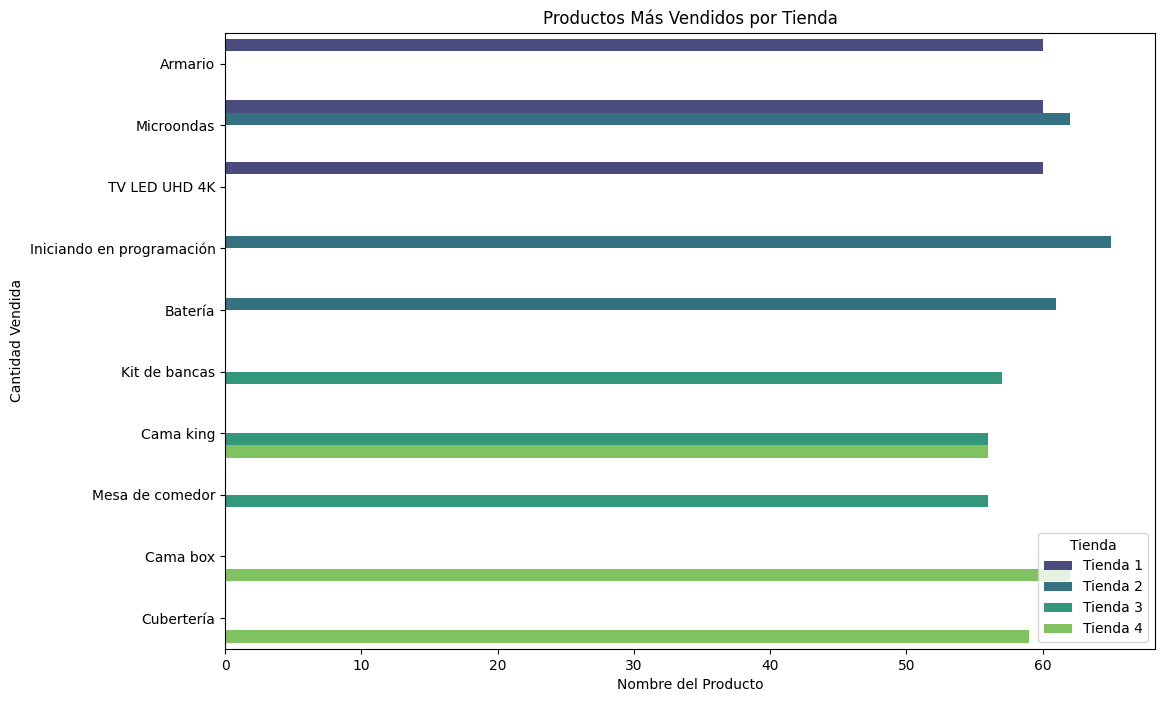

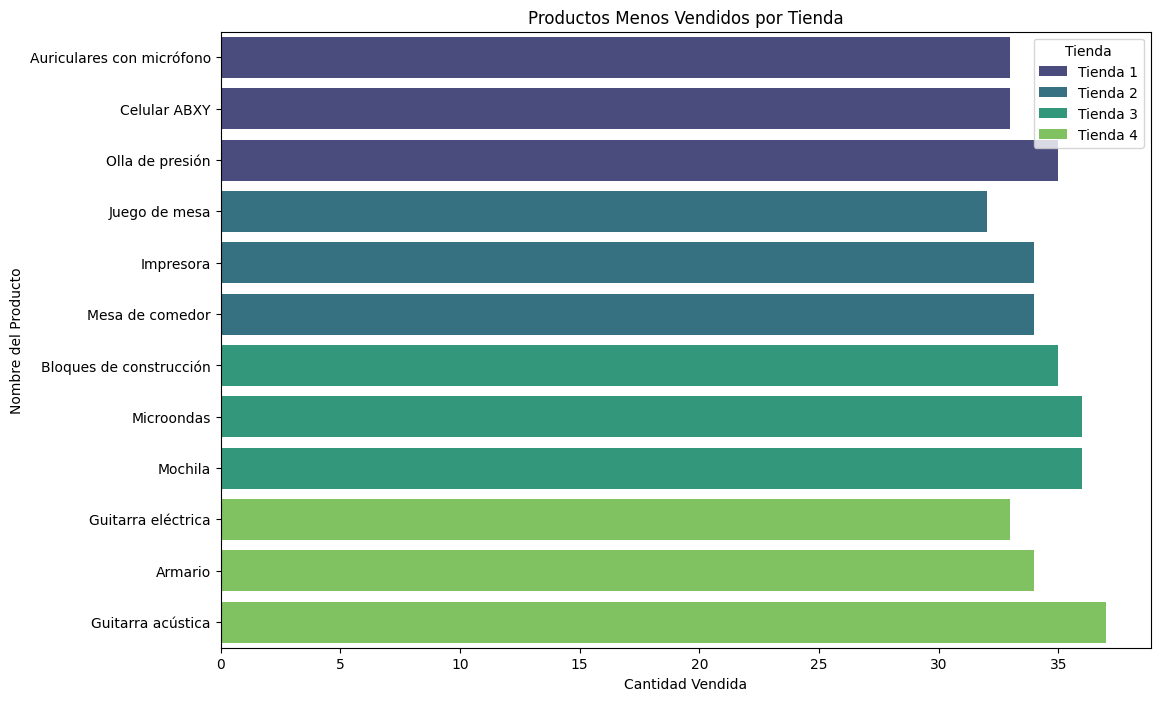

In [45]:
# Visualización de los productos más vendidos por tienda
plt.figure(figsize=(12, 8))
sns.barplot(x='Cantidad Vendida', y='Producto', hue='Tienda', data=productos_mas_vendidos, palette='viridis')
plt.title('Productos Más Vendidos por Tienda')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Nombre del Producto')
plt.show()

# Visualización de los productos menos vendidos por tienda
plt.figure(figsize=(12, 8))
sns.barplot(x='Cantidad Vendida', y='Producto', hue='Tienda', data=productos_menos_vendidos, palette='viridis')
plt.title('Productos Menos Vendidos por Tienda')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Nombre del Producto')
plt.show()

# 5. Envío promedio por tienda

In [48]:
# Calcular el costo de envío promedio para cada tienda
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

print(f"Costo de envío promedio Tienda 1: {round(costo_envio_promedio_tienda1, 2)}\n")
print(f"Costo de envío promedio Tienda 2: {round(costo_envio_promedio_tienda2, 2)}\n")
print(f"Costo de envío promedio Tienda 3: {round(costo_envio_promedio_tienda3, 2)}\n")
print(f"Costo de envío promedio Tienda 4: {round(costo_envio_promedio_tienda4, 2)}\n")

Costo de envío promedio Tienda 1: 26018.61

Costo de envío promedio Tienda 2: 25216.24

Costo de envío promedio Tienda 3: 24805.68

Costo de envío promedio Tienda 4: 23459.46



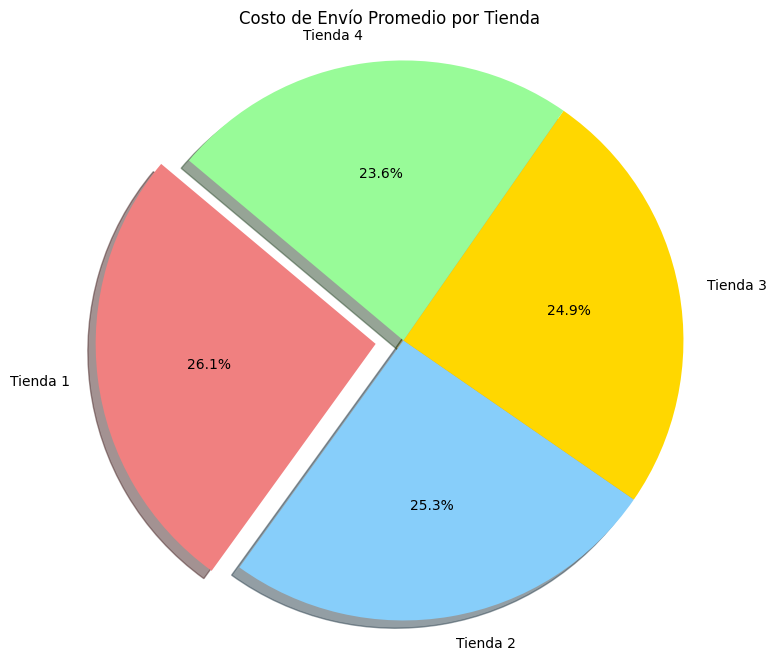

In [78]:
import matplotlib.pyplot as plt
costos_envio = [costo_envio_promedio_tienda1, costo_envio_promedio_tienda2, costo_envio_promedio_tienda3, costo_envio_promedio_tienda4]
etiquetas_envio = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores_envio = ['lightcoral', 'lightskyblue', 'gold', 'palegreen']
explode_envio = (0.1, 0, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(costos_envio, explode=explode_envio, labels=etiquetas_envio, colors=colores_envio,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Costo de Envío Promedio por Tienda')
plt.show()



# Informe Final de Análisis de Tiendas – Recomendación para el Sr. Juan

El presente informe tiene como objetivo determinar cuál es la tienda más adecuada para que el Sr. Juan realice sus ventas. Para ello, se han analizado diversos factores clave que influyen directamente en el rendimiento comercial de cada tienda: ingresos totales, productos más y menos vendidos, categorías de productos más y menos populares, calificaciones promedio otorgadas por los clientes y el coste de envío promedio. La información fue extraída de los registros de cuatro tiendas distintas.

# Desarrollo

Los datos mas relebantes encontrados en el analisis anterior fueron los siguientes:

1. Ingresos Totales

Tienda 1: $1,150,880,400

Tienda 2: $1,116,343,500

Tienda 3: $1,098,019,600

Tienda 4: $1,038,375,700

👉 Tienda 1 lidera en ingresos totales, lo que refleja una alta rotación de productos o una mayor proporción de ventas de productos de alto valor.


2. Costo de Envío Promedio

Tienda 1: $26,019

Tienda 2: $25,216

Tienda 3: $24,806

Tienda 4: $23,459

👉 Tienda 4 tiene el menor costo promedio de envío, lo que puede ser atractivo para compradores sensibles a los costos adicionales.

3. Calificación Promedio de Clientes
Tienda 3: 4.05

Tienda 2: 4.04

Tienda 4: 3.99

Tienda 1: 3.98

👉 Tienda 3 destaca por la mejor experiencia de cliente, lo cual puede influir en la fidelización y en la percepción positiva del producto del Sr. Juan.

4. Categorías de Productos Más y Menos Vendidas
En todas las tiendas, la categoría más vendida es "Muebles", lo que indica una fuerte demanda en este segmento.

Las categorías menos vendidas varían:

Tienda 1 y 2: Artículos para el hogar

Tienda 3 y 4: Instrumentos musicales

👉 Esto sugiere que si el Sr. Juan vende productos del hogar o instrumentos musicales, debería evitar las tiendas donde esas categorías no tienen buena acogida.

5. Productos Más y Menos Vendidos
Los productos más vendidos incluyen artículos como TV LED UHD 4K, Kit de bancas, y Cama box.

Los productos menos vendidos son específicos como Auriculares con micrófono y Guitarra eléctrica, lo cual puede deberse a poca demanda o alto precio.

👉 Esto puede orientar al Sr. Juan sobre el tipo de producto que podría ofrecer en función del comportamiento de compra en cada tienda.

# Conclusión y Recomendación
Después de considerar todos los factores analizados, recomendamos que el Sr. Juan venda en la Tienda 1. A pesar de no tener la mejor calificación promedio ni el menor costo de envío, es la tienda con mayores ingresos totales, lo que indica un gran volumen de ventas. Además, comparte con las demás el dominio de la categoría “Muebles”, lo que da una idea clara de la preferencia del consumidor.

La Tienda 3 podría ser una segunda opción si la prioridad del Sr. Juan es una buena experiencia del cliente y calificaciones altas. Sin embargo, su volumen de ingresos es menor y su categoría menos vendida (instrumentos musicales) podría ser una desventaja dependiendo del producto que se desee vender.

En conclusión, Tienda 1 representa la mejor combinación de alcance comercial y demanda efectiva, lo cual proporciona el entorno más favorable para maximizar las ventas del Sr. Juan.